In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def load_model():

    latent_size = 128

    # Load the model parameters as a OrderedDict
    state_dict = torch.load("G_100epoch_24k.pth")
    print(state_dict.keys())

    # Create a torch.nn.Module object
    model = nn.Sequential(
        # in: latent_size x 1 x 1

        nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        # out: 512 x 4 x 4

        nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        # out: 256 x 8 x 8

        nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        # out: 128 x 16 x 16

        nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        # out: 64 x 32 x 32

        nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
        nn.Tanh()
        # out: 3 x 64 x 64
    )

    # Load the model parameters into the torch.nn.Module object
    model.load_state_dict(state_dict)

    # Now you can access the state_dict attribute on the torch.nn.Module object
    print(model.state_dict())

odict_keys(['0.weight', '1.weight', '1.bias', '1.running_mean', '1.running_var', '1.num_batches_tracked', '3.weight', '4.weight', '4.bias', '4.running_mean', '4.running_var', '4.num_batches_tracked', '6.weight', '7.weight', '7.bias', '7.running_mean', '7.running_var', '7.num_batches_tracked', '9.weight', '10.weight', '10.bias', '10.running_mean', '10.running_var', '10.num_batches_tracked', '12.weight'])
OrderedDict([('0.weight', tensor([[[[ 3.3909e-03,  7.0707e-03,  6.2273e-03,  1.0211e-02],
          [ 4.8947e-02, -1.6755e-02,  9.8377e-03, -7.5914e-04],
          [-3.3857e-02,  1.4646e-02, -3.1712e-02,  2.1417e-04],
          [ 1.1162e-02, -4.4008e-03,  1.0033e-02, -2.1089e-03]],

         [[-1.0291e-02, -3.0614e-02, -2.6322e-04, -2.7732e-02],
          [ 6.2331e-03,  3.1519e-03,  6.3119e-03,  2.3226e-02],
          [-3.1801e-03,  5.8265e-03, -1.2362e-02,  1.6310e-02],
          [-2.2891e-02, -1.7590e-02,  8.1064e-03, -1.5409e-02]],

         [[ 1.2666e-02,  2.0550e-02,  2.5408e-03,  

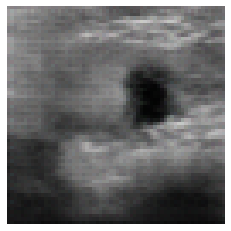

In [18]:
batch_size = 10
latent_size = 128

model.eval()

random_latent_vector = torch.randn(1, latent_size, 1, 1)

# Generate an image using the generator model
with torch.no_grad():
    generated_image = model(random_latent_vector)

# Reshape the generated image to (3, 64, 64) for visualization (assuming you're using RGB images)
generated_image = generated_image.squeeze().cpu().numpy()

# Scale the pixel values from [-1, 1] to [0, 1] for visualization
generated_image = (generated_image + 1) / 2.0

# Display the generated image using matplotlib
plt.imshow(generated_image.transpose(1, 2, 0))
plt.axis('off')
plt.show()

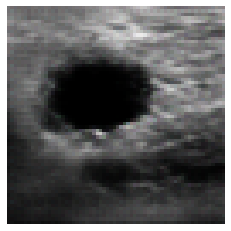

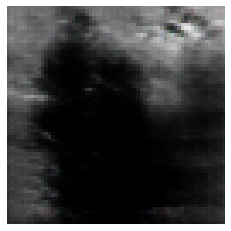

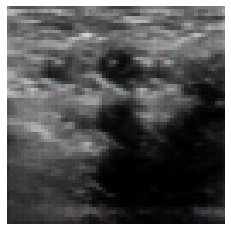

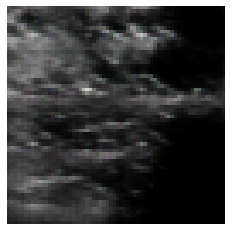

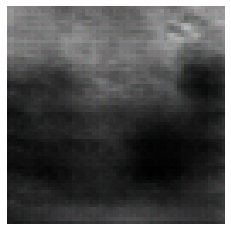

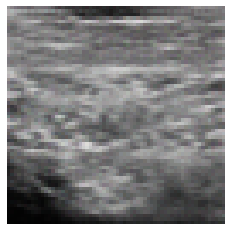

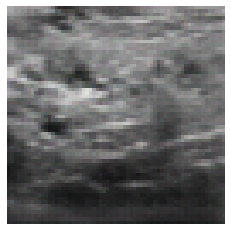

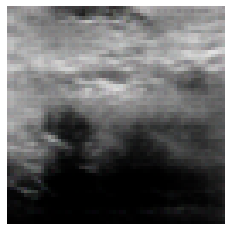

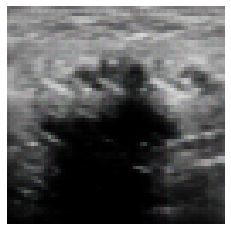

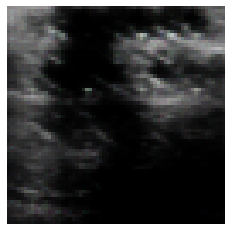

In [21]:
batch_size = 10
latent_size = 128

# Generate an image using the generator model
def generate_images(num):
    for i in range(num):
        random_latent_vector = torch.randn(1, latent_size, 1, 1)
        with torch.no_grad():
            generated_image = model(random_latent_vector)

        # Reshape the generated image to (3, 64, 64) for visualization (assuming you're using RGB images)
        generated_image = generated_image.squeeze().cpu().numpy()

        # Scale the pixel values from [-1, 1] to [0, 1] for visualization
        generated_image = (generated_image + 1) / 2.0

        # Display the generated image using matplotlib
        plt.imshow(generated_image.transpose(1, 2, 0))
        plt.axis('off')
        plt.show()

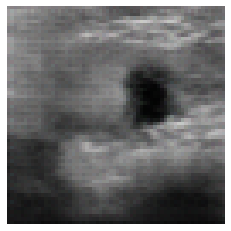

In [18]:
batch_size = 10
latent_size = 128

model.eval()

random_latent_vector = torch.randn(1, latent_size, 1, 1)

# Generate an image using the generator model
with torch.no_grad():
    generated_image = model(random_latent_vector)

# Reshape the generated image to (3, 64, 64) for visualization (assuming you're using RGB images)
generated_image = generated_image.squeeze().cpu().numpy()

# Scale the pixel values from [-1, 1] to [0, 1] for visualization
generated_image = (generated_image + 1) / 2.0

# Display the generated image using matplotlib
plt.imshow(generated_image.transpose(1, 2, 0))
plt.axis('off')
plt.show()

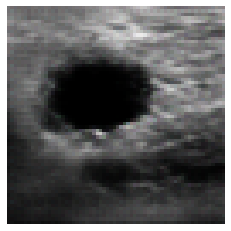

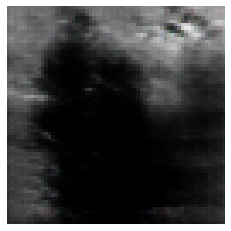

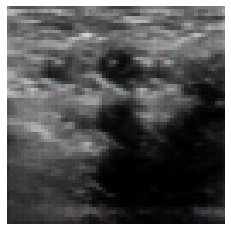

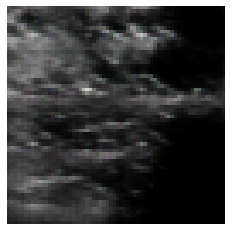

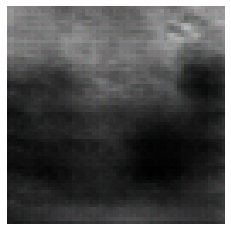

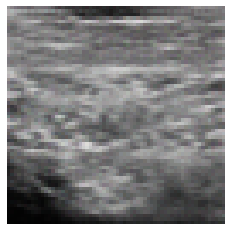

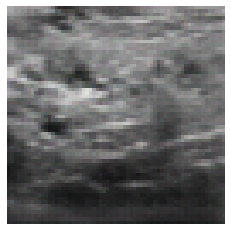

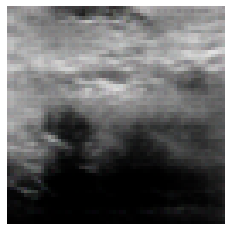

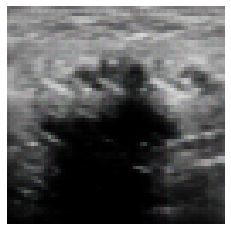

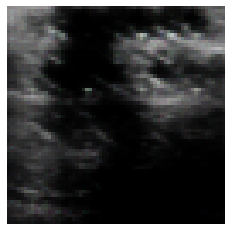

In [21]:
batch_size = 10
latent_size = 128

# Generate an image using the generator model
def generate_images(num):
    for i in range(num):
        random_latent_vector = torch.randn(1, latent_size, 1, 1)
        with torch.no_grad():
            generated_image = model(random_latent_vector)

        # Reshape the generated image to (3, 64, 64) for visualization (assuming you're using RGB images)
        generated_image = generated_image.squeeze().cpu().numpy()

        # Scale the pixel values from [-1, 1] to [0, 1] for visualization
        generated_image = (generated_image + 1) / 2.0

        # Display the generated image using matplotlib
        plt.imshow(generated_image.transpose(1, 2, 0))
        plt.axis('off')
        plt.show()